In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%%html
<link rel="stylesheet" href="custom.css"/>

Distributions

In [3]:
def irwin_hall(n, N):
    i_h = np.zeros(N)
    for i in range(N):
        i_h[i] = st.uniform.rvs(size=n).sum()
    
    return i_h

In [4]:
def bates(n, N):
    bates = np.zeros(N)
    for i in range(N):
        bates[i] = st.uniform.rvs(size=n).mean()
    
    return bates

In [5]:
def student_t(n, N):
    t = np.zeros(N)
    for i in range(N):
        t[i] = st.norm.rvs(size=n).sum()
    
    return t

Visualisation

In [6]:
def visualise(arr, label):
    plt.hist(arr, bins=50, density=True, histtype='step', label=label)
    plt.legend(loc='upper left')

Comparison

In [7]:
def compose(f, g):
    return lambda *x: f(g(*x))

In [8]:
def shift_scale(arr):
    return (arr - arr.mean())/arr.std()

In [9]:
def compare(funcs, n, N):
    for func in funcs:
        rvs = func(n, N)
        visualise(rvs, func.__name__)

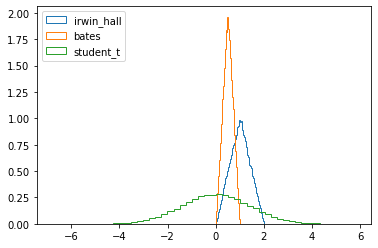

In [10]:
compare([irwin_hall, bates, student_t], 2, 100000)

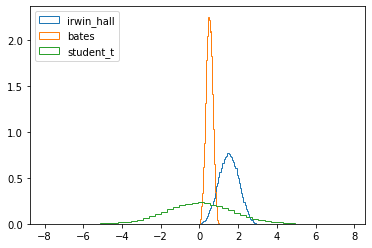

In [11]:
compare([irwin_hall, bates, student_t], 3, 100000)

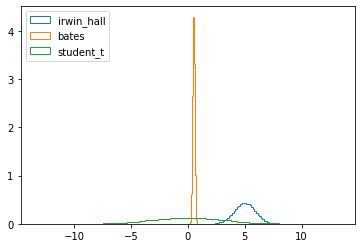

In [12]:
compare([irwin_hall, bates, student_t], 10, 100000)

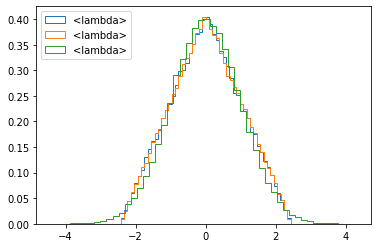

In [13]:
compare((compose(shift_scale, f) for f in [irwin_hall, bates, student_t]), 2, 100000)

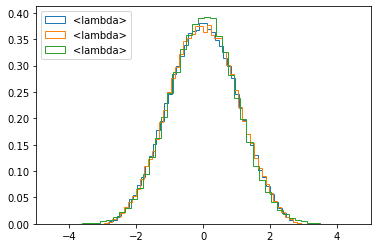

In [14]:
compare((compose(shift_scale, f) for f in [irwin_hall, bates, student_t]), 3, 100000)

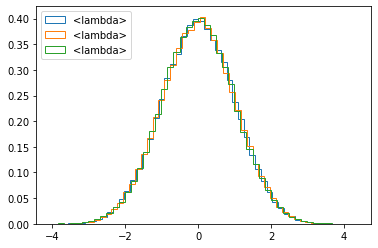

In [15]:
compare((compose(shift_scale, f) for f in [irwin_hall, bates, student_t]), 10, 100000)

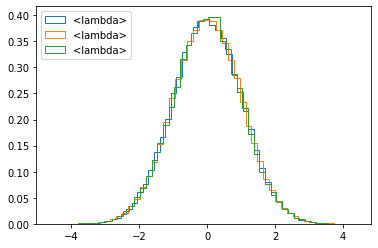

In [16]:
compare((compose(shift_scale, f) for f in [irwin_hall, bates, student_t]), 30, 100000)